# CSE6250BDH Deep Learning Labs
## 2. Convolutional Neural Network

In this chapter, we will learn how to implement a convolutional neural network by using PyTorch.

#### 0. Prepare Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
5,X14.V1.56,55,28,18,16,16,19,25,40,52,...,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
6,X3.V1.191,-55,-9,52,111,135,129,103,72,37,...,-125,-99,-79,-62,-41,-26,11,67,128,4
7,X11.V1.273,1,-2,-8,-11,-12,-17,-15,-16,-18,...,-79,-91,-97,-88,-76,-72,-66,-57,-39,2
8,X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,...,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
9,X3.V1.491,8,15,13,3,-6,-8,-5,4,25,...,49,31,11,-5,-17,-19,-15,-15,-11,4


In [3]:
labels = df['y'].as_matrix()
labels

array([4, 1, 5, ..., 5, 3, 4])

In [4]:
labels = labels - 1
labels

array([3, 0, 4, ..., 4, 2, 3])

In [5]:
data = df.loc[:, 'X1':'X178'].as_matrix()
data

array([[ 135,  190,  229, ..., -116,  -83,  -51],
       [ 386,  382,  356, ...,  154,  143,  129],
       [ -32,  -39,  -47, ...,  -35,  -35,  -36],
       ..., 
       [  14,    6,  -13, ...,   -2,   -1,   -8],
       [ -40,  -25,   -9, ...,   68,   59,   55],
       [  29,   41,   57, ...,   -2,    2,   20]])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
print(X_train.shape, X_valid.shape, X_test.shape)
print(X_train.shape[0] + X_valid.shape[0] + X_test.shape[0])

(7360, 178) (1840, 178) (2300, 178)
11500


#### 1. Loading Datasets

In [7]:
import torch
from torch.utils.data import DataLoader, TensorDataset

trainset = TensorDataset(torch.from_numpy(X_train.astype('float32')).unsqueeze(1), torch.from_numpy(y_train.astype('long')))
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True, num_workers=2)

validset = TensorDataset(torch.from_numpy(X_valid.astype('float32')).unsqueeze(1), torch.from_numpy(y_valid.astype('long')))
validloader = torch.utils.data.DataLoader(validset, batch_size=10, shuffle=False, num_workers=2)

testset = TensorDataset(torch.from_numpy(X_test.astype('float32')).unsqueeze(1), torch.from_numpy(y_test.astype('long')))
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False, num_workers=2)

classes = ('Seizure', 'TumorArea', 'HealthyArea', 'EyesClosed', 'EyesOpen')

In [8]:
# get some random training samples
dataiter = iter(trainloader)
X_samples, y_samples = dataiter.next()

print(X_samples)
print(y_samples)


( 0 ,.,.) = 
   -19   -16   -17  ...     61    53    51

( 1 ,.,.) = 
     2    15    17  ...    -10    -5    -4

( 2 ,.,.) = 
    11    11    21  ...     11     9     9
... 

( 7 ,.,.) = 
   -57   -64   -66  ...    -10   -11   -19

( 8 ,.,.) = 
   -37   -39   -37  ...      7    10     8

( 9 ,.,.) = 
   -33   -24   -30  ...    -41   -38   -38
[torch.FloatTensor of size 10x1x178]


 1
 1
 2
 0
 0
 3
 1
 1
 1
 1
[torch.LongTensor of size 10]



#### 2. Define CNN class

In [9]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [10]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool1d(kernel_size=2)
        self.conv2 = nn.Conv1d(6, 16, 5)
        self.fc1 = nn.Linear(in_features=16 * 41, out_features=128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 41)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = ConvNet()

In [11]:
output = model(Variable(X_samples))
output

Variable containing:
 -0.0156   0.2110   0.3316  -1.0866  -0.0624
 -0.3960   1.6696  -0.4364  -1.2227  -0.0488
 -0.2639   0.5063   0.1829  -0.2284  -0.2020
 -1.6908  11.8203   0.4599   2.7914  -7.0594
  0.5914   1.8860  -1.0367   0.8535  -0.3153
  1.0441   1.6985   1.4154   0.5137  -0.4273
  0.5759   1.2493   0.1438  -0.1076  -0.0482
  0.9516   1.9148   1.0534  -1.2498  -1.2622
  0.9561   1.8501  -0.4844   0.3026  -0.0860
 -0.1372   0.3454   0.3510  -0.4858   0.0786
[torch.FloatTensor of size 10x5]

#### 3. Define a Loss function and optimizer

In [12]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

#### 4. Train the network

In [13]:
cuda = torch.cuda.is_available()
cuda

True

In [14]:
if cuda:
    model = model.cuda()

In [15]:
train_losses = []
valid_losses = []

for epoch in range(10):  # loop over the dataset multiple times

    # set the model as train mode
    model.train()
    train_loss = 0.0
    train_counter = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, targets = data

        # wrap them in Variable
        inputs, targets = Variable(inputs), Variable(targets)
        if cuda:
            inputs, targets = inputs.cuda(), targets.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        train_loss += (loss.data[0] * inputs.size(0))
        train_counter += inputs.size(0)

    train_losses.append(train_loss/train_counter)
    
    # switch to evaluation mode
    model.eval()
    valid_loss = 0.0
    valid_counter = 0
    for i, data in enumerate(validloader, 0):
        # get the inputs
        inputs, targets = data

        # wrap them in Variable
        inputs, targets = Variable(inputs, volatile=True), Variable(targets, volatile=True)
        if cuda:
            inputs, targets = inputs.cuda(), targets.cuda()

        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        valid_loss += (loss.data[0] * inputs.size(0))
        valid_counter += inputs.size(0)
    valid_losses.append(valid_loss/valid_counter)
    
print('Finished Training')


Finished Training


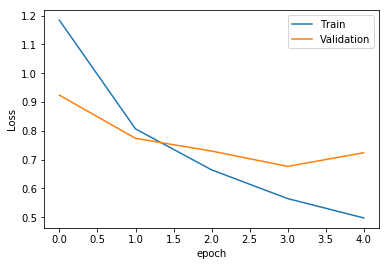

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.arange(len(train_losses)), train_losses, label='Train')
plt.plot(np.arange(len(valid_losses)), valid_losses, label='Validation')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(loc="best")

#### 5. Test the network on the test data

In [30]:
class_correct = list(0. for i in range(len(classes)))
class_total = list(0. for i in range(len(classes)))
for data in testloader:
    # get the inputs
    inputs, targets = data

    # wrap them in Variable
    inputs = Variable(inputs, volatile=True)
    if cuda:
        inputs, targets = inputs.cuda(), targets.cuda()

    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == targets).squeeze()
    for i, label in enumerate(targets):
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(len(classes)):
    print('Accuracy of %s : %2d%% out of %d cases' % (classes[i], 100 * class_correct[i] / class_total[i], class_total[i]))

Accuracy of Seizure : 90% out of 454 cases
Accuracy of TumorArea : 49% out of 477 cases
Accuracy of HealthyArea : 60% out of 472 cases
Accuracy of EyesClosed : 87% out of 422 cases
Accuracy of EyesOpen : 55% out of 475 cases


### Exercise 1. What can we infer from the loss plot above?

### Exercise 2. Try to run on CPU and compare the computation time? Is there a huge difference or not? Why?

### Exercise 3. Modify the network or the training procedure to improve the performance. 

### Exercise 4. Since the class 1 (Epileptic seizure) is the one we mostly care about, try to convert the problem into binary (class 1 vs rest) classification. Then, train and test the network to see the performce on binary setting.